In [65]:
import numpy as np

from bokeh.io import curdoc, output_notebook
from bokeh.layouts import row, widgetbox
from bokeh.models import ColumnDataSource
from bokeh.models.widgets import Slider, TextInput
from bokeh.plotting import figure,show, gridplot

from fit_data import *

In [66]:
# Get test data 
detunings, transmission = get_data('data/p1.9mw_det.gpt')
T = 130.0+273.15
freq_centers = [-0.12, 0.0, 3.0, 6.0]
x, _= multiple_profile(T, freq_centers, detunings)
source = ColumnDataSource(data=dict(x = detunings, y=x))


In [70]:
# Plot properties 

p1 = figure(plot_height = 400, plot_width = 400, title = "Testing with Bokeh", 
             tools = 'pan, reset, save, wheel_zoom')
# p2 = figure(plot_height=800, plot_width = 600, tools = 'pan, reset, save, wheel_zoom')


p1.line(detunings, transmission,line_width=3, line_alpha = 0.6)
p1.line('x', 'y', source = source, line_width=3, line_alpha=0.6, line_color = 'red')
# p1.line(detunings, x, line_width = 3, line_alpha=0.6, line_color = 'red')
# p2.line(detunings, x, line_width=3, line_alpha=0.6)
p1.xaxis.axis_label = 'Detunings (MHz)'
p1.yaxis.axis_label = 'Transmission'


In [71]:
output_notebook()

Loading BokehJS ...

In [72]:
show(p1)

In [ ]:
type(detunings)

In [ ]:
# Setting up the widgets 

text = TextInput(title="title", value="Test for Bokeh")
temp_slider = Slider(title="Temperature", value = 130.0, start = 0.0, end = 200.0, step = 0.1)
center_1 = Slider(title = "Center 1", value = 0.0, start = -10.0, end = 10.0, step = 0.1)
center_2 = Slider(title = "Center 2", value = 0.0, start = -10.0, end = 10.0, step = 0.1)
center_3 = Slider(title = "Center 3", value = 0.0, start = -10.0, end = 10.0, step = 0.1)
center_4 = Slider(title = "Center 4", value = 0.0, start = -10.0, end = 10.0, step = 0.1)


In [ ]:
# Update title 
def update_title(attrname, old, new):
    plot.title.text = text.value

text.on_change('value', update_title)


In [ ]:
def update_data(attrname, old,new):
    T = temp_slider.value+273.15
    c1,c2,c3,c4 = center_1.value, center_2.value, center_3.value, center_4.value 
    freq_centers = [c1,c2,c3,c4]
    x, _ = multiple_profile(T,freq_centers,detunings)
    source.data = dict(x=x, y = y)

In [ ]:
for w  in [temp_slider, center_1, center_2, center_3, center_4]:
    w.on_change('value', update_data)
    

In [ ]:
inputs = widgetbox(text, temp_slider, center_1, center_2, center_3, center_4)

In [ ]:
curdoc().add_root(row(inputs, plot, width = 800))
curdoc().title = "Test"

In [ ]:
show(p1)

In [73]:
detunings, transmission = get_data('data/p400uw_144_det.gpt')

In [74]:
len(detunings)

111814

In [78]:
detunings_clipped = detunings[:111800]
transmission_clipped = transmission[:111800]

In [80]:
new_length = len(detunings_clipped)/100
print new_length

1118


In [84]:
detunings_reduced = []
transmission_reduced = []
for i in range(new_length):
    det = np.average(detunings_clipped[100*i:100*(i+1)])
    trans = np.average(transmission_clipped[100*i:100*(i+1)])
    detunings_reduced.append(det)
    transmission_reduced.append(trans)

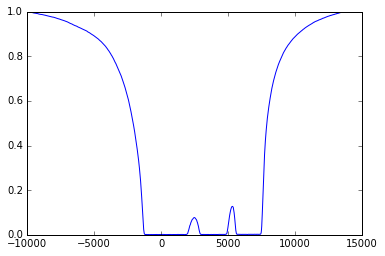

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(detunings_reduced, transmission_reduced)

In [86]:
write2file('data/p400uw_144_reduced.gpt', detunings_reduced, transmission_reduced)

Written data to file : data/p400uw_144_reduced.gpt

